In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [29]:
X_train[0].shape

(28, 28)

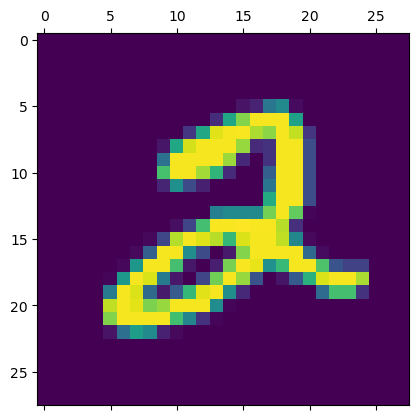

In [9]:
plt.matshow(X_train[5])

In [33]:
y_train[1:6:2]

array([0, 1, 2], dtype=uint8)

In [88]:
X_train.shape

(60000, 28, 28)

In [89]:
X_train = X_train/255
X_test = X_test/255

In [90]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [91]:
#Converting from 2D array to 1D array to get all the neurons !!!

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [92]:
X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

In [93]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [94]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 1ms/step - loss: 0.4654 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3040 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9257


In [95]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2655 - accuracy: 0.9256


[0.2654948830604553, 0.925599992275238]

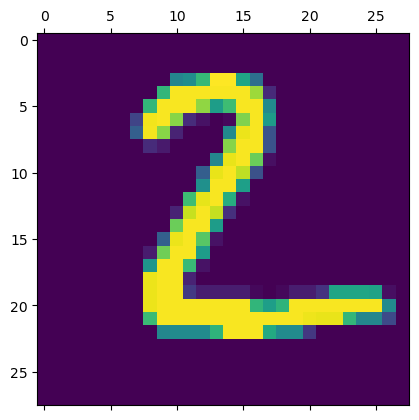

In [107]:
plt.matshow(X_test[1])

In [109]:
y_predicted = model.predict(X_test_flattened)

In [110]:
y_predicted[1]

array([4.6429303e-01, 6.6062510e-03, 9.9964499e-01, 4.5762798e-01,
       5.6219551e-10, 8.2620239e-01, 9.2946923e-01, 1.7490422e-12,
       1.3712385e-01, 3.4855037e-09], dtype=float32)

In [111]:
#it is showing the output in the form of array values ,, so we have to see for maximum values

np.argmax(y_predicted[1])

2

In [114]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [115]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [116]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    5,    9,    2,    1,    1],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   4,   11,  935,   15,    6,    2,   13,   10,   31,    5],
       [   2,    0,   19,  934,    0,   15,    4,   11,   18,    7],
       [   1,    2,    6,    1,  916,    0,   12,    4,    9,   31],
       [   7,    3,    4,   41,    8,  773,   19,    5,   26,    6],
       [   7,    3,    6,    1,    7,   10,  921,    2,    1,    0],
       [   1,    8,   22,    9,    8,    0,    0,  946,    1,   33],
       [   7,   10,    8,   29,    9,   33,   10,   12,  848,    8],
       [  11,    7,    1,   11,   30,   10,    0,   27,    4,  908]])>

Text(95.72222222222221, 0.5, 'Truth')

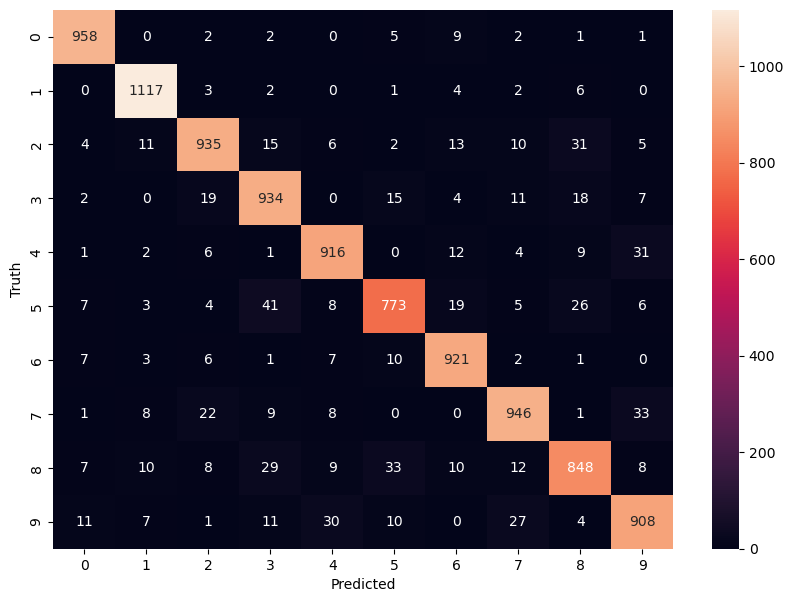

In [117]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [118]:
#adding hidden layer to improve the accuracy of the model

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10 ,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2720 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1231 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0852 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0639 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0506 - accuracy: 0.9847


In [119]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.9759


[0.0752088651061058, 0.9758999943733215]

Text(95.72222222222221, 0.5, 'Truth')

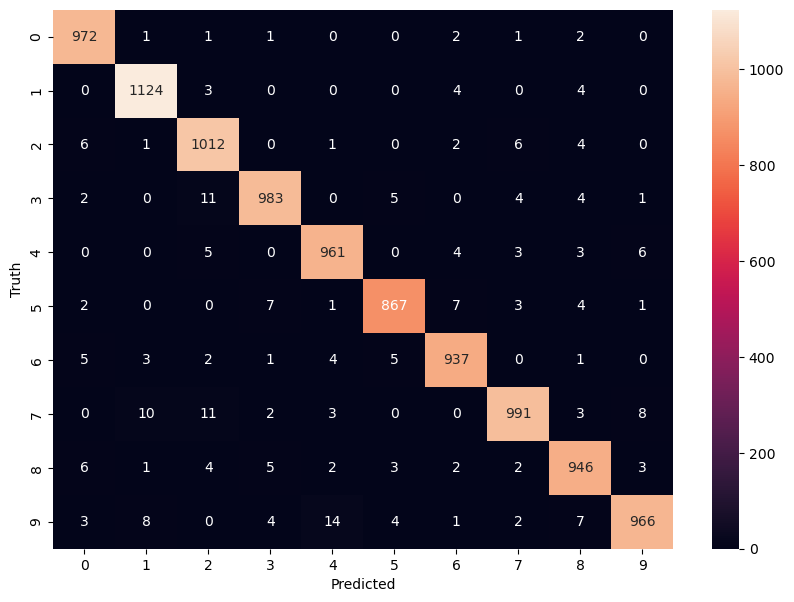

In [121]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')